# Importing Libraries and Dataset

In [250]:
import pandas as pd
import numpy as np

#Libraries for text pre-processing
import re
import nltk
# Stopwords needs to be downloaded before use
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer 
from nltk.tokenize import word_tokenize
# WordNetLemmatizer needs to be downloaded before use
from nltk.stem.wordnet import WordNetLemmatizer
#To track function execution
from tqdm import tqdm
from bs4 import BeautifulSoup 

#Below are the libraries for Data Visualisation
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Libraries for text preparation and visualization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import coo_matrix


In [251]:
#importing the dataset
dataSet = pd.read_csv("dataSet.csv")
dataSet.head()

,news_id,title,content,link,date
0,1,Do chatbots really help you stay productive?,GUEST: When Slack burst onto the workplace sce...,http://venturebeat.com/?p=2141494,2017-01-01
1,2,Spanish social advertising company Adsmurai ra...,Barcelona-based social advertising company Ads...,http://venturebeat.com/?p=2141069,2017-01-01
2,3,HTC: No Vive 2 at CES,I\u2019d wager most people who bought the HTC ...,http://venturebeat.com/?p=2141559,2017-01-01
3,4,Chinese firms reportedly ordered to pay Disney...,(Reuters) &#8212;\xa0A Shanghai court ordered ...,http://venturebeat.com/?p=2141698,2017-01-01
4,5,AWS sees growth in database migrations,Public cloud market leader Amazon Web Services...,http://venturebeat.com/?p=2141375,2017-01-01


# Text Exploration 

In [252]:
#Counting the number of words in content.
dataSet["content_word_count"] = dataSet["content"].apply(lambda x: len(str(x).split(" ")))
dataSet[["content","content_word_count"]].head()

,content,content_word_count
0,GUEST: When Slack burst onto the workplace sce...,56
1,Barcelona-based social advertising company Ads...,55
2,I\u2019d wager most people who bought the HTC ...,55
3,(Reuters) &#8212;\xa0A Shanghai court ordered ...,55
4,Public cloud market leader Amazon Web Services...,55


In [253]:
#Statistics of word count to check for range and average number of the words in each article.
dataSet["content_word_count"].describe()

count    10641.000000
mean        55.126868
std          2.138414
min          7.000000
25%         55.000000
50%         55.000000
75%         55.000000
max         81.000000
Name: content_word_count, dtype: float64

In [254]:
#Checking for top 20 most repeated words - Gives insights on data specific stop words.

common_words = pd.Series(' '.join(dataSet["content"]).split()).value_counts()
common_words[:20]

the     23870
to      14206
a       14071
of      13703
and     13182
in       9538
is       7126
that     6577
for      6467
The      5153
on       4988
its      4439
has      4213
with     4078
it       3717
new      2808
as       2796
will     2607
from     2509
an       2421
dtype: int64

In [255]:
#20 most uncommon words - Which rarely occures. 
common_words[-20:]

Presidents                     1
Rigetti                        1
wide-brimmed                   1
safeguarding                   1
Obviously,                     1
&#8220;Today\u2019s            1
research\xa0that               1
(PWA)                          1
platforms,&#160;[&#8230;]\n    1
new&#160;investment...\n       1
4)                             1
Raikes,                        1
maim                           1
Mounted                        1
USSR.                          1
greenRush's                    1
Marketplace.&#160;The...\n     1
80-20                          1
called?                        1
Battlefront&#8217;s            1
dtype: int64

# Text Preprocessing

In [263]:
# Removing Stop words. - Take list of inbuilt stopwords and customizing it by added stopwords specific to this documents (From most common words generated in above step)
stop_words = set(stopwords.words("english")) 

#Adding common words of this document to stop_words
add_words = ["xa","the","to","a","of","and","in","is","that","for","The","on","its","has","with","it","new","as","will","from","an"]
stop_words = stop_words.union(add_words)

In [264]:
#Below is the function to clean the text and prepare it for nect phase. 
from tqdm import tqdm
corpus = []
def clean_content(df):
    cleaned_content = []

    for sent in tqdm(dataSet['content']+" "+dataSet["title"]):
        
        #remove html content
        review_content = BeautifulSoup(sent).get_text()
            
        #remove non-alphabetic characters
        review_content = re.sub("[^a-zA-Z]"," ", review_content)
    
        #tokenize the sentences
        words = word_tokenize(review_content.lower())
    
        #lemmatize each word to its lemma
        lem = WordNetLemmatizer()
        lemma_words = [lem.lemmatize(word) for word in words if not word in stop_words] 
        lemma_words = " ".join(lemma_words)
        cleaned_content.append(lemma_words)
        
        corpus.append(lemma_words)
        
        
    return(cleaned_content)

In [265]:
dataSet["cleaned_content"] = clean_content(dataSet)





  0%|                                                                                        | 0/10641 [00:00<?, ?it/s]



  1%|▌                                                                             | 69/10641 [00:00<00:15, 683.07it/s]



  1%|▉                                                                            | 128/10641 [00:00<00:16, 649.72it/s]



  2%|█▍                                                                           | 194/10641 [00:00<00:16, 648.22it/s]



  2%|█▊                                                                           | 255/10641 [00:00<00:16, 630.97it/s]



  3%|██▎                                                                          | 311/10641 [00:00<00:17, 601.56it/s]



  4%|██▋                                                                          | 378/10641 [00:00<00:16, 615.84it/s]



  4%|███▏                                                                         | 441/10641 [00:00<00:16, 616.04it/s]



  5%|███▋   

 80%|████████████████████████████████████████████████████████████▌               | 8475/10641 [00:14<00:03, 651.44it/s]



 80%|█████████████████████████████████████████████████████████████               | 8547/10641 [00:14<00:03, 667.30it/s]



 81%|█████████████████████████████████████████████████████████████▌              | 8615/10641 [00:14<00:03, 658.51it/s]



 82%|██████████████████████████████████████████████████████████████              | 8682/10641 [00:14<00:03, 640.82it/s]



 82%|██████████████████████████████████████████████████████████████▍             | 8747/10641 [00:14<00:03, 624.92it/s]



 83%|██████████████████████████████████████████████████████████████▉             | 8810/10641 [00:14<00:02, 616.16it/s]



 83%|███████████████████████████████████████████████████████████████▎            | 8872/10641 [00:14<00:02, 609.77it/s]



 84%|███████████████████████████████████████████████████████████████▊            | 8934/10641 [00:14<00:02, 609.09it/s]



 85%|███████████

In [266]:
#DataFrame with cleaned content tab.
dataSet.head()

,news_id,title,content,link,date,content_word_count,cleaned_content
0,1,Do chatbots really help you stay productive?,GUEST: When Slack burst onto the workplace sce...,http://venturebeat.com/?p=2141494,2017-01-01,56,guest slack burst onto workplace scene employe...
1,2,Spanish social advertising company Adsmurai ra...,Barcelona-based social advertising company Ads...,http://venturebeat.com/?p=2141069,2017-01-01,55,barcelona based social advertising company ads...
2,3,HTC: No Vive 2 at CES,I\u2019d wager most people who bought the HTC ...,http://venturebeat.com/?p=2141559,2017-01-01,55,u wager people bought htc vive love unit wish ...
3,4,Chinese firms reportedly ordered to pay Disney...,(Reuters) &#8212;\xa0A Shanghai court ordered ...,http://venturebeat.com/?p=2141698,2017-01-01,55,reuters shanghai court ordered two chinese fir...
4,5,AWS sees growth in database migrations,Public cloud market leader Amazon Web Services...,http://venturebeat.com/?p=2141375,2017-01-01,55,public cloud market leader amazon web service ...


# Data Exploration

In [267]:
#Visualizing the content after pre-processing for most frequently used words.
wordcloud = WordCloud(
                    background_color = "white",
                    stopwords = stop_words,
                    max_words = 100,
                    max_font_size = 50).generate(str(corpus))

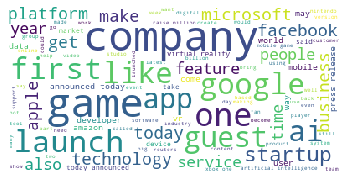

In [268]:
# Displaying the word cloud
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

[Text(0, 0, 'game'),
 Text(0, 0, 'company'),
 Text(0, 0, 'million'),
 Text(0, 0, 'today'),
 Text(0, 0, 'year'),
 Text(0, 0, 'one'),
 Text(0, 0, 'announced'),
 Text(0, 0, 'google'),
 Text(0, 0, 'first'),
 Text(0, 0, 'ai'),
 Text(0, 0, 'service'),
 Text(0, 0, 'mobile'),
 Text(0, 0, 'startup'),
 Text(0, 0, 'like'),
 Text(0, 0, 'developer'),
 Text(0, 0, 'world'),
 Text(0, 0, 'technology'),
 Text(0, 0, 'based'),
 Text(0, 0, 'guest'),
 Text(0, 0, 'time')]

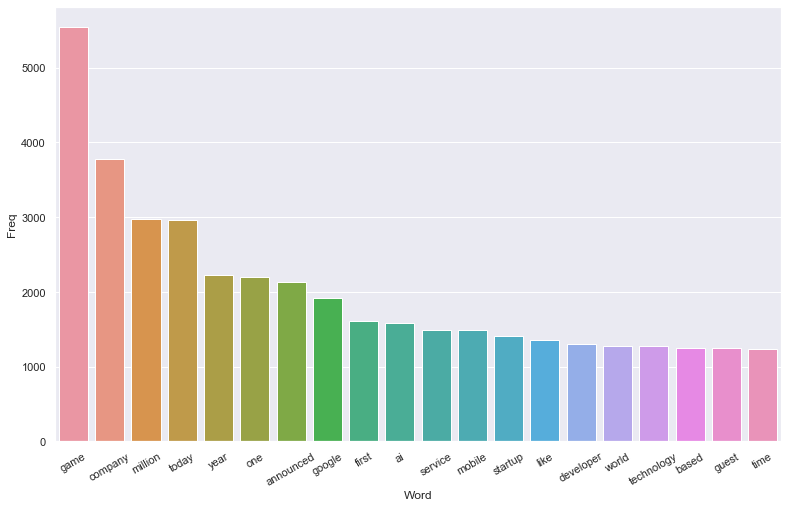

In [269]:
#Visualizing the Most frequently occuring words after cleanup process. 
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

# Text Prepration and Visualization

In [270]:
#Building Vocabulary of known words using count_vectorizer
cv = CountVectorizer(max_df = 0.8,stop_words = stop_words)

In [271]:
X = cv.fit_transform(dataSet["cleaned_content"])

In [272]:
#Listing the top 10 words from the vocabulary
list(cv.vocabulary_.keys())[:10]

['guest',
 'slack',
 'burst',
 'onto',
 'workplace',
 'scene',
 'employee',
 'rejoiced',
 'finally',
 'way']

In [273]:
tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)

# get feature names
feature_names = cv.get_feature_names()

Based on the Tf-Idf score, we can extract the keyword for the document. The word with the highest tf-Idf score will be the key word for that document

In [274]:
#Functions to extact the top words from TfIdf
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key = lambda x: (x[1], x[0]), reverse = True)

def extract_from_vector(feature_names, sorted_items, topn = 10):
    sorted_items = sorted_items[:topn]
    
    score_vals = []
    feature_vals = []
    
    for idx, score in sorted_items:
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
    #for score in sorted_items[1][:topn]:
    #    
    
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results


In [277]:
#Creating two new columns for the DataFrame and assigning it default value.
dataSet["Articles_top_keyword"] = ""
dataSet["Articles_top_keyword_tfidf_score"] = 0

#Finding the Key word for each article along with their tfidf value and appending it to the dataframe.
for i in range(len(dataSet["cleaned_content"])):
    doc = dataSet["cleaned_content"][i]
    #print (doc)
    tf_idf_vector = tfidf_transformer.transform(cv.transform([doc]))
    
    sorted_items = sort_coo(tf_idf_vector.tocoo())

    keywords = extract_from_vector(feature_names, sorted_items, 1)

    for k in keywords:
        dataSet["Articles_top_keyword"].iloc[i] = k
        dataSet["Articles_top_keyword_tfidf_score"].iloc[i] = keywords[k]
        
print("Loop Completed")

Loop Completed


In [278]:
#Displaying the dataFrame with top keyword for each article and its corresponding TfIdf score.
dataSet.head()

,news_id,title,content,link,date,content_word_count,cleaned_content,Articles_top_keyword,Articles_top_keyword_tfidf_score
0,1,Do chatbots really help you stay productive?,GUEST: When Slack burst onto the workplace sce...,http://venturebeat.com/?p=2141494,2017-01-01,56,guest slack burst onto workplace scene employe...,slack,0.314
1,2,Spanish social advertising company Adsmurai ra...,Barcelona-based social advertising company Ads...,http://venturebeat.com/?p=2141069,2017-01-01,55,barcelona based social advertising company ads...,adsmurai,0.532
2,3,HTC: No Vive 2 at CES,I\u2019d wager most people who bought the HTC ...,http://venturebeat.com/?p=2141559,2017-01-01,55,u wager people bought htc vive love unit wish ...,htc,0.374
3,4,Chinese firms reportedly ordered to pay Disney...,(Reuters) &#8212;\xa0A Shanghai court ordered ...,http://venturebeat.com/?p=2141698,2017-01-01,55,reuters shanghai court ordered two chinese fir...,pixar,0.342
4,5,AWS sees growth in database migrations,Public cloud market leader Amazon Web Services...,http://venturebeat.com/?p=2141375,2017-01-01,55,public cloud market leader amazon web service ...,aws,0.476


In [279]:
#Finding the top 10 keywords of the entire document.
corpus_list = " ".join(corpus)
doc = corpus_list
tf_idf_vector = tfidf_transformer.transform(cv.transform([doc]))
sorted_items = sort_coo(tf_idf_vector.tocoo())

keywords = extract_from_vector(feature_names, sorted_items, 10)

for k in keywords:
    print(k,end=" ")
    print(keywords[k])    

game 0.25
company 0.164
million 0.161
today 0.132
google 0.128
year 0.118
one 0.117
announced 0.108
ai 0.104
mobile 0.097


In [281]:
#Saving the file to the local machine.
dataSet.to_csv("most_common.csv")